In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
## Load Dataset

! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)


Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


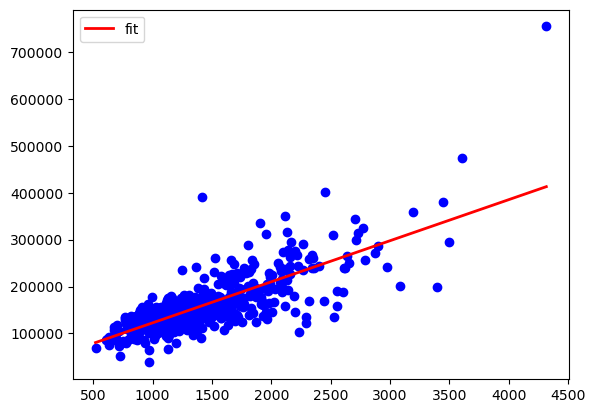

In [3]:
#First we define a plotting function because we're going to do this often and we want to reuse our code:

def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit',linewidth=2.0) ;plt.legend()

   # ## PLot the reference theoretical linear model using mand b
   # m_ref = 87.688145
   # b_ref = 34754.077892
   # linear_y_ref = linear_x * m_ref + b_ref
   # plt.plot(linear_x,linear_y_ref,'k--',label='Reference',linewidth=2.0) ;plt.legend()
    
   # # add labels to the axis
   # plt.xlabel('GrLivArea ($m^2$)',fontsize=12)
   # plt.ylabel('SalePrice ($)',fontsize=12)

# Use the fucntion 
plot_data(x=data['GrLivArea'].to_numpy(),y=data['SalePrice'].to_numpy(),m=87.688145,b=34754.077892)

In [4]:
## Define SGD linear model. 

# Define function with model with 2 parameters
def model(x,m,b):
    return m *x + b

# Define the loss function
def loss_funtion(x,y, m,b): # Takes the ref, pred, and parameters to be optimized 
    y_predicted = model(x,m,b)
    return np.power(y-y_predicted,2)

## Define functions to update m and b

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db



In [5]:
# set our initial slope and intercept
m = 1.
b = 1.
m_calc = 87.688145
b_calc = 34754.077892
verbose = True
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
loss_history_full = []
# Store Model Predictions
model_predictions = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 10
for i in range(loop_N):
    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # store the model predictions
    model_predictions.append(model(data_x,m,b))

    # calculate the loss value
    loss_value = np.mean(loss_funtion(data_x,data_y,m,b))

    # keep a history of our loss values
    loss_history.append(loss_value)
    loss_history_full.append(loss_funtion(data_x,data_y,m,b))
    # close/delete previous plots
    plt.close('all')


    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc


    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
    # gives us time to see the plot
    time.sleep(2.0)
    # clears the plot when the next plot is ready to show.
    ipydis.clear_output(wait=True)

    # Print the updated parameters
    if verbose:
        print('Iteration %d: m = %.2f, b = %.2f' % (i,m,b))



Iteration 9: m = 89.27, b = 32277.91


## Homework #1


## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like 
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use 
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*(len(data['GrLivArea'])//batch_size
```

Please plot your learning curve for different batch size, such as 64, 256, 1024, 4096. 


In [6]:
10*(len(data_x)//60)

90

In [7]:
# set our initial slope and intercept
m = 1.
b = 1.
m_calc = 87.688145
b_calc = 34754.077892
verbose = True
batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
loss_history_full = []
# Store Model Predictions
model_predictions = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
# data_x = data['GrLivArea'].to_numpy()
# data_y = data['SalePrice'].to_numpy()
# data_batch = data.sample(n=batch_size)
# data_x = data_batch['GrLivArea'].to_numpy()
# data_y = data_batch['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 2
for i in range(loop_N*(len(data)//batch_size)):
    data_batch = data.sample(n=batch_size,replace=True,random_state=i)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()

    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # store the model predictions
    model_predictions.append(model(data_x,m,b))

    # calculate the loss value
    loss_value = np.mean(loss_funtion(data_x,data_y,m,b))

    # keep a history of our loss values
    loss_history.append(loss_value)
    loss_history_full.append(loss_funtion(data_x,data_y,m,b))
    # close/delete previous plots
    plt.close('all')


    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
    # gives us time to see the plot
    time.sleep(2.0)
    # clears the plot when the next plot is ready to show.
    ipydis.clear_output(wait=True)

    # Print the updated parameters
    if verbose:
        print('Iteration %d: m = %.2f, b = %.2f' % (i,m,b))
        # Print loss
        print('Loss: %.2f \n' % loss_value)



Iteration 17: m = 89.35, b = 32248.32
Loss: 1049178637.66 



In [8]:
# set our initial slope and intercept
m = 1.
b = 1.
m_calc = 87.688145
b_calc = 34754.077892
verbose = True
batch_64 = 64
batch_256 = 256
batch_1024 = 1024
batch_4096 = 4096

# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1


# Store Model Predictions
model_predictions = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
# data_x = data['GrLivArea'].to_numpy()
# data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 30

def losses_calc(batch):
    m = 1.
    b = 1.


    # set a learning rate for each parameter
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1
    # use these to plot our progress over time
    loss_history = []

    for i in range(loop_N*(len(data)//batch)):
        data_batch = data.sample(n=batch,replace=False,random_state=i)
        # Deal with empty batches
        
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        # update our slope and intercept based on the current values
        m = updated_m(data_x,data_y,m,b,learning_rate_m)
        b = updated_b(data_x,data_y,m,b,learning_rate_b)
        # calculate the loss value
        loss_value = np.mean(loss_funtion(data_x,data_y,m,b))
        # keep a history of our loss values
        loss_history.append(loss_value)

    return loss_history

# Use the function for different batch sizes
losses_64 = losses_calc(batch_64)
losses_256 = losses_calc(batch_256)
losses_1024 = losses_calc(batch_1024)
losses_4096 = losses_calc(batch_4096)

    

In [9]:
def losses_calc(batch, loop_N):
    m = 1.
    b = 1.

    # Set a learning rate for each parameter
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1
    
    # Use these to plot our progress over time
    loss_history = []

    # Adjust iteration count based on loop_N and batch size
    iterations = max(loop_N * (len(data) // batch), loop_N)

    for i in range(iterations):
        data_batch = data.sample(n=batch, replace=True, random_state=i)
        
        # Extract features and target variable from the batch
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        
        # Update slope and intercept based on the current values
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)
        
        # Calculate the loss value
        loss_value = np.mean(loss_funtion(data_x, data_y, m, b))
        
        # Keep a history of our loss values
        loss_history.append(loss_value)

    return loss_history

# Use the function for different batch sizes
N = 1000
losses_64 = losses_calc(batch_64,N)
losses_256 = losses_calc(batch_256,N)
losses_1024 = losses_calc(batch_1024,N)
losses_4096 = losses_calc(batch_4096,N)

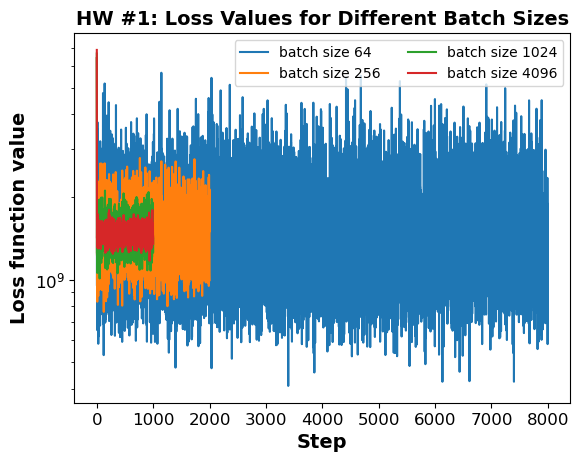

Average loss values for different batch sizes:
Batch size 64: 1.33e+09
Batch size 256: 1.45e+09
Batch size 1024: 1.50e+09
Batch size 4096: 1.50e+09


In [10]:
## PLot the loss values for different batch sizes
plt.title('HW #1: Loss Values for Different Batch Sizes', fontsize=14, fontweight='bold')
plt.plot(losses_64, label='batch size 64')
plt.plot(losses_256, label='batch size 256')
plt.plot(losses_1024, label='batch size 1024')
plt.plot(losses_4096, label='batch size 4096')
plt.yscale('log')
plt.xlabel('Step', fontsize=14, fontweight='bold')
plt.ylabel('Loss function value', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(ncol=2,)
plt.show()


## Print the average loss values for different batch sizes considering the last 10% of the iterations. Use scientific notation for the loss values.
print('Average loss values for different batch sizes:')
print('Batch size 64: {:.2e}'.format(np.mean(losses_64[-int(N*0.1):])))
print('Batch size 256: {:.2e}'.format(np.mean(losses_256[-int(N*0.1):])))
print('Batch size 1024: {:.2e}'.format(np.mean(losses_1024[-int(N*0.1):])))
print('Batch size 4096: {:.2e}'.format(np.mean(losses_4096[-int(N*0.1):])))




#### Discussion:

The outcomes derived from the loss function computation using varying batch sizes reveal that a smaller batch size (64) yields a reduced value compared to larger batch sizes. However, this reduction comes at the cost of significantly increased training duration, owing to the necessity for more iterations to cover the entirety of the training dataset with smaller batch sizes. Furthermore, the plotted data indicates a higher standard deviation associated with this particular training batch size compared to others. This outcome is anticipated due to the inherent variability introduced by differing samples within each batch iteration, contrasting with higher batch sizes where samples are often duplicated to meet the batch size requirement. Consequently, as the batch size increases relative to the original dataset size, the standard deviation of loss function values diminishes while the training timne is reduced.

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge. 
```
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*16
(64, 1e-7, 1e-1)*32
...
```

In [11]:
def losses_calc_multiplier(batch, loop_N,multiplier):
    m = 1.
    b = 1.

    # Set a learning rate for each parameter
    learning_rate_m = 1e-7 * multiplier
    learning_rate_b = 1e-1 * multiplier
    batch = batch * multiplier
    
    # Use these to plot our progress over time
    loss_history = []

    # Adjust iteration count based on loop_N and batch size
    iterations = max(loop_N * (len(data) // batch), loop_N)

    for i in range(iterations):
        data_batch = data.sample(n=batch, replace=True, random_state=i)
        
        # Extract features and target variable from the batch
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        
        # Update slope and intercept based on the current values
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)
        
        # Calculate the loss value
        loss_value = np.mean(loss_funtion(data_x, data_y, m, b))
        
        # Keep a history of our loss values
        loss_history.append(loss_value)

    return loss_history

# Use the function for different batch sizes
N = 100
multiplier = 1
losses_multi_1 = losses_calc_multiplier(batch_64,N,multiplier)
# multiplier = 2
# losses_multi_2 = losses_calc_multiplier(batch_64,N,multiplier)
multiplier = 4
losses_multi_4 = losses_calc_multiplier(batch_64,N,multiplier)
multiplier = 16
losses_multi_16 = losses_calc_multiplier(batch_64,N,multiplier)
# multiplier = 32
# losses_multi_32 = losses_calc_multiplier(batch_64,N,multiplier)
# multiplier = 64
# losses_multi_64 = losses_calc_multiplier(batch_64,N,multiplier)

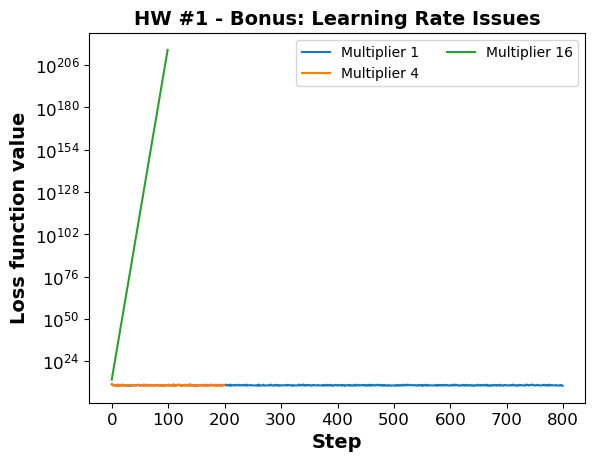

Average loss values for different batch sizes:
Multiplier 1: 1.12e+09
Multiplier 4: 1.49e+09
Multiplier 16: 2.48e+214


In [12]:
## PLot the loss values for different batch sizes
plt.title('HW #1 - Bonus: Learning Rate Issues', fontsize=14, fontweight='bold')
plt.plot(losses_multi_1, label='Multiplier 1')
#plt.plot(losses_multi_2, label='Multiplier 2')
plt.plot(losses_multi_4, label='Multiplier 4')
plt.plot(losses_multi_16, label='Multiplier 16')
#.plot(losses_multi_32, label='Multiplier 32')
#plt.plot(losses_multi_64, label='Multiplier 64')


plt.yscale('log')
plt.xlabel('Step', fontsize=14, fontweight='bold')
plt.ylabel('Loss function value', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(ncol=2,)
plt.show()


# ## Print the average loss values for different batch sizes considering the last 10% of the iterations. Use scientific notation for the loss values.
print('Average loss values for different batch sizes:')
print('Multiplier 1: {:.2e}'.format(np.mean(losses_multi_1[-int(N*0.1):])))
# print('Multiplier 2: {:.2e}'.format(np.mean(losses_multi_2[-int(N*0.1):])))
print('Multiplier 4: {:.2e}'.format(np.mean(losses_multi_4[-int(N*0.1):])))
print('Multiplier 16: {:.2e}'.format(np.mean(losses_multi_16[-int(N*0.1):])))


#### Discussion:
Increasing both batch size and learning rates linearly eventually leads to a threshold where the learning rate becomes excessively large, thereby complicating the minimization process for the learning curve to converge towards the global minimum. Consequently, this can lead to suboptimal fitting of parameters, deteriorating model predictions with each training iteration, ultimately resulting in a loss function that fails to converge.